### Library imports  
I will use pandas for data processing, and matplotlib for data visualization. Also pandasql helps me with handling data using SQL queries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import pandasql as sq

%matplotlib inline

### Discovery of train.csv

In [2]:
train_data = pd.read_csv('../datasets/train.csv')
train_data.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null object
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: float64(3), int

In [4]:
train_data.groupby('category_name')['deal_probability'].mean().sort_values(ascending=False).head()

category_name
Предложение услуг    0.403123
Кошки                0.297259
Автомобили           0.278427
Другие животные      0.264051
Собаки               0.252812
Name: deal_probability, dtype: float64

In [5]:
train_data.groupby('parent_category_name')['deal_probability'].mean().sort_values(ascending=False).head()

parent_category_name
Услуги                 0.403123
Транспорт              0.263336
Животные               0.235957
Для дома и дачи        0.179633
Бытовая электроника    0.175421
Name: deal_probability, dtype: float64

In [6]:
train_data.groupby('region')['deal_probability'].mean().sort_values(ascending=False).head()

region
Оренбургская область    0.155921
Ставропольский край     0.153586
Башкортостан            0.148859
Удмуртия                0.148130
Краснодарский край      0.147066
Name: deal_probability, dtype: float64

In [7]:
train_data.groupby('user_type')['deal_probability'].mean().sort_values(ascending=False).head()

user_type
Private    0.149557
Company    0.124513
Shop       0.062829
Name: deal_probability, dtype: float64

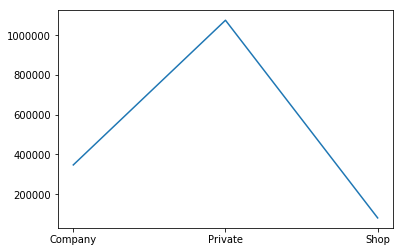

In [8]:
pl.plot(train_data[['user_type','region']].groupby('user_type').count())

{'boxes': [<matplotlib.lines.Line2D at 0x120bb1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x120bba20>,
 'fliers': [<matplotlib.lines.Line2D at 0x120cb4e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x120cb160>],
 'whiskers': [<matplotlib.lines.Line2D at 0x120bb2e8>,
  <matplotlib.lines.Line2D at 0x120bb6d8>]}

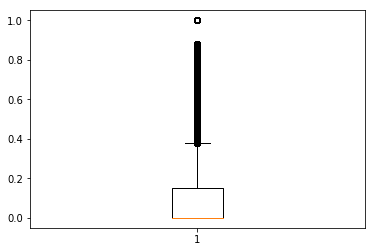

In [9]:
pl.boxplot(train_data['deal_probability'])

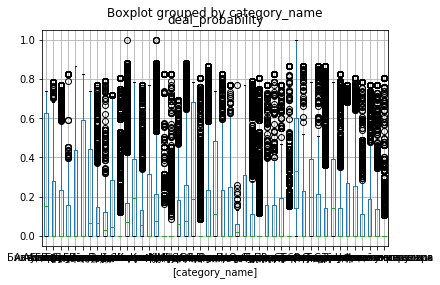

In [22]:
train2 = train_data[['category_name','deal_probability']]
train2.boxplot(by='category_name')

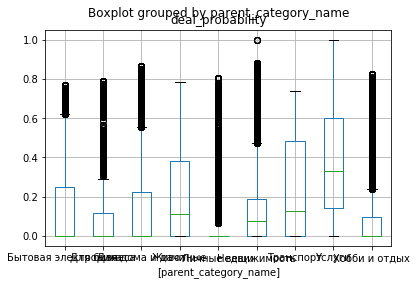

In [23]:
train2 = train_data[['parent_category_name','deal_probability']]
train2.boxplot(by='parent_category_name')

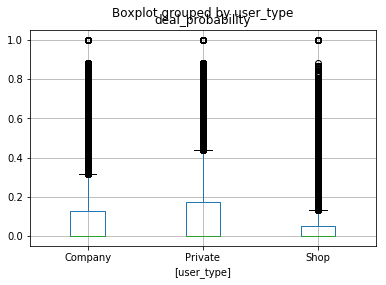

In [24]:
train2 = train_data[['user_type','deal_probability']]
train2.boxplot(by='user_type')

### Discovery of periods_train.csv

In [10]:
period_train = pd.read_csv('../datasets/periods_train.csv')
period_train.head()

,item_id,activation_date,date_from,date_to
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28


In [11]:
period_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16687412 entries, 0 to 16687411
Data columns (total 4 columns):
item_id            object
activation_date    object
date_from          object
date_to            object
dtypes: object(4)
memory usage: 509.3+ MB
